```{image} hca-logo.png
:width: 200px
:class: hca-logo
```

# HCA DCP User Analytics - August vs July 2022

This section displays metrics collected from Google Analytics HCA DCP Data Portal and Data Browser and compares August 2022 with the previous month (July 2022). The generation of this report is now coded in Jupiter notebooks and can be rerun easily and modified or consolidated as desired. 

### Geographic exclusions

The data presented excludes access from Cambridge, UK and surrounds, Cambridge MA and surrounds, and San Francisco, CA and surrounds an attempt to exclude the HCA DCP development team member activity from the report.


### Key to tables

On the tables:

* Diffs, e.g. <span style="color: green">(+19.04%)</span> or <span style="color: red">(-12.03%)</span>, compare the later month with the previous month.
* "+" Indicates the entry is new in the report in the current month.
* "↑" Indicates the entry has moved up in rank since the last month.
* "↓" Indicates the entry has moved down in rank since the last month.



In [19]:
# !pip install google_auth_oauthlib 
# !pip install install google-api-python-client
# !pip install pandas 
# !pip install numpy
# !pip install matplotlib
# !pip install google-cloud-bigquery
# !pip install db-dtypes

# DEV GUIDES
#https://developers.google.com/analytics/devguides/reporting
    




In [2]:
import warnings
warnings.filterwarnings('ignore')

In [10]:
from google_auth_oauthlib.flow import InstalledAppFlow
from googleapiclient.discovery import build
from IPython.display import display
import os
import pprint
# import pandas as pd
# import matplotlib.pyplot as plt
# import numpy as np

%load_ext autoreload
%autoreload 2

import analytics_package.analytics.charts as ac
import analytics_hca as hca

GA_PROPERTY = "185740629" # HCA Data Portal/Browser
# DCP_ANALYTICS_START = "2019-03-01"
DCP_ANALYTICS_START = "2020-01-01"
TODAY = 'today'
PERIOD = "2022-08"
PREV_PERIOD = "2022-07"
GEO_SEGMENT = "gaid::q-RjXBSdQ-i18vXOOoXl5g"

default_params = {
    "property": GA_PROPERTY,
    "index_key_formatter": hca.adjust_table_index_key,
    "period": PERIOD,
    "prev_period": PREV_PERIOD,
    "segment": GEO_SEGMENT
}

ac.authenticate_ga('ANALYTICS_REPORTING_CLIENT_SECRET_PATH')



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=713613812354-ccedl8colb27q3q6rvvvjqrpb5tcbuug.apps.googleusercontent.com&redirect_uri=http%3A%2F%2Flocalhost%3A8080%2F&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fanalytics.readonly&state=oBo9jgFpeQBwKeuBe1fDiYA2seS6R7&access_type=offline


(<googleapiclient.discovery.Resource at 0xe6e1dd95b0>,
 <function analytics_package.analytics.api.<lambda>(service, params)>,
 {},
 <google.oauth2.credentials.Credentials at 0xe6e1c64280>)

In [2]:
ac.init_tables()

## User acquisition

### Monthly users and pageviews (all time)

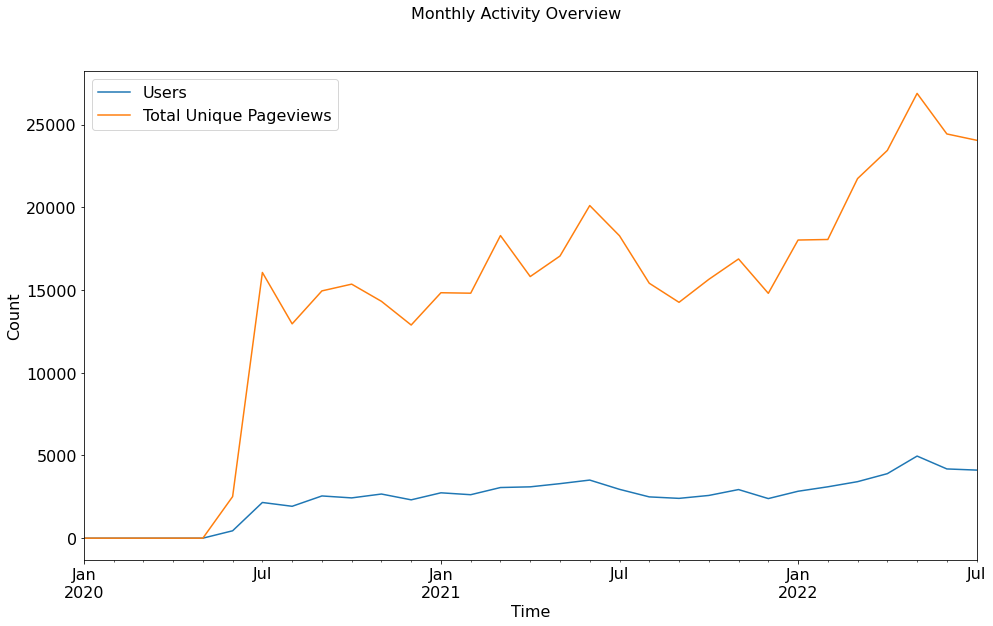

In [3]:
users_over_time_table = hca.plot_users_over_time(start_date=DCP_ANALYTICS_START, end_date=TODAY, **default_params)

### Total unique users and unique pageviews by month (all time)

In [4]:
display(users_over_time_table)

<div style="page-break-after: always"></div>

### Users and sessions
Users are distinguished based on a tracking cookie set by Google. Because cookies may not remain present over time or between devices, it's likely that total users are overcounted and returning users are undercounted.

In [5]:
ac.show_difference_table("Total Users", None, "ga:users", None, **default_params)

In [23]:
ac.show_difference_table("Returning Users", None, "ga:users", None, filters="ga:userType==Returning Visitor", **default_params)

In [24]:
ac.show_difference_table("Total Visits", None, "ga:sessions", None, **default_params)

In [25]:
ac.show_difference_table("Sessions Including Visits to Data Portal", None, "ga:sessions", None, filters="ga:pagePath!~/explore", **default_params)

In [26]:
ac.show_difference_table("Sessions Including Visits to Data Browser", None, "ga:sessions", None, filters="ga:pagePath=~/explore", **default_params)

### Top referrers

In [52]:
ac.show_difference_table("Users", "Referrer", "ga:users","ga:source", rows_limit=27, **default_params)

<div style="page-break-after: always"></div>

### Social network referrers

In [30]:
ac.show_difference_table("User Sessions", "Social Network", "ga:sessions", "ga:socialNetwork", **default_params)

### Top countries

In [29]:
ac.show_difference_table("Users", "Country", "ga:users","ga:country", rows_limit=29, **default_params)

<div style="page-break-after: always"></div>

### Device category

In [27]:
ac.show_difference_table(["Users", "Percentage of users"], "Category", "ga:users", "ga:deviceCategory", percentage_metrics={"ga:users"}, **default_params)

### Top entrances

In [31]:
ac.show_difference_table("Entrances", "Page", "ga:entrances","ga:pagePath", **default_params)

<div style="page-break-after: always"></div>

## Downloads and exports
### Download project manifest

In [32]:
ac.show_difference_table(["Users", "Count"], "Action", ["ga:users", "ga:hits"], ["ga:eventAction", "ga:eventCategory"], filters="ga:eventCategory==Project;ga:eventAction==Download Project Manifest", rows_type="fixed", **default_params)

### Download project matrix

In [33]:
ac.show_difference_table(["Users", "Count"], "Download Type", ["ga:users", "ga:hits"], ["ga:dimension6", "ga:eventAction", "ga:eventCategory"], filters="ga:eventCategory==Project;ga:eventAction==Download Project Matrix", rows_type="fixed", **default_params)

### Request curl command for selected data

In [34]:
ac.show_difference_table(["Users", "Count"], "curl Request From Search Results", ["ga:users", "ga:hits"], ["ga:dimension1", "ga:eventAction", "ga:eventCategory"], filters="ga:eventAction==Request;ga:dimension1==Bulk Download", rows_type="fixed", **default_params)

### Metadata request/download from selected data

In [35]:
ac.show_difference_table(["Users", "Count"], "Metadata Request/Download From Search Results", ["ga:users", "ga:hits"], ["ga:dimension1", "ga:eventAction", "ga:eventCategory"], filters="ga:eventCategory==Manifest;ga:eventAction=~Request|Download;ga:dimension1=~Cohort Manifest|Cohort Manifest Link", rows_type="fixed", **default_params)

### Request export from selected data

In [36]:
ac.show_difference_table(["Users", "Count"], "Request Export From Search Results", ["ga:users", "ga:hits"], ["ga:dimension3", "ga:dimension1", "ga:eventAction", "ga:eventCategory"], filters="ga:eventCategory==Export;ga:eventAction==Request;ga:dimension1==Cohort Export;ga:dimension3==Terra", rows_type="fixed", **default_params)

### Top direct file download file types (from files tab)

In [5]:
ac.show_difference_table("Downloads", "File Type", "ga:hits", "ga:dimension6", filters="ga:eventCategory==File;ga:eventAction==Download", **default_params)

<div style="page-break-after: always"></div>

### Direct file downloads (from files tab)

In [37]:
ac.show_difference_table(["Users", "Count"], "Action", ["ga:users", "ga:hits"], ["ga:eventAction", "ga:eventCategory"], filters="ga:eventCategory==File;ga:eventAction==Download", rows_type="fixed", **default_params)

### Top "export selected data" queries

In [11]:
ac.show_difference_table("Selected for Export Count", "Query", "ga:pageviews", "ga:pagePath", filters="ga:pagePath=~/explore/export/export-to-terra|/explore/export/get-curl-command|/explore/export/download-manifest", rows_limit=24, split_vertical=[5, 9, 3], **default_params)

<div style="page-break-after: always"></div>

## Entities
### Entity tabs selections (project, samples, files)

In [40]:
ac.show_difference_table("Count", "Entity Tab", "ga:hits", "ga:eventLabel", filters="ga:eventCategory==Entity;ga:eventAction==Select Tab", **default_params)

## Search facets
### Top facets

In [41]:
ac.show_difference_table("Count", "Facet", "ga:hits", "ga:dimension9", filters="ga:eventCategory==Search;ga:eventAction==Select", **default_params)

<div style="page-break-after: always"></div>

### Top facet terms

In [42]:
ac.show_difference_table("Count", ["Facet", "Term"], "ga:hits", ["ga:dimension9", "ga:dimension10"], filters="ga:eventCategory==Search;ga:eventAction==Select", **default_params)

<div style="page-break-after: always"></div>

## Projects
### Top project detail pages

In [43]:
ac.show_difference_table("Count", "Project", "ga:pageviews", "ga:pagePath", filters="ga:pagePath=~^(\\/explore\\/projects\\/[0-9a-fA-F]{8}\\-[0-9a-fA-F]{4}\\-[0-9a-fA-F]{4}\\-[0-9a-fA-F]{4}\\-[0-9a-fA-F]{12})(\\/?\\?{0}|\\/?\\?{1}.*)$", **default_params)

### Withdrawn/deprecated projects visits

In [45]:
ac.show_difference_table("Count", "Project Type", "ga:hits", "ga:eventAction", filters="ga:eventAction=~View Deprecated Project|View Withdrawn Project", **default_params)

<div style="page-break-after: always"></div>

### Analysis protocol portal links

In [46]:
ac.show_difference_table("Count", "Analysis Protocol", "ga:hits", "ga:eventLabel", filters="ga:eventCategory==Portal Link;ga:eventAction==Click", **default_params)

### Project detail supplementary links visits (from external resources)

In [44]:
ac.show_difference_table("Visits", "Link", "ga:hits", ["ga:dimension4", "ga:dimension6", "ga:eventLabel"], filters="ga:eventCategory==Project;ga:eventAction==View External Resource", **default_params)

<div style="page-break-after: always"></div>

## Data Portal
### Top landing pages

In [47]:
ac.show_difference_table("Count", "Path", "ga:entrances", "ga:landingPagePath", filters="ga:landingPagePath!~^\/explore", **default_params)

<div style="page-break-after: always"></div>

### Top pages

In [48]:
ac.show_difference_table("Count", "Path", "ga:pageviews", "ga:pagePath", filters="ga:pagePath!~^\/explore", **default_params)

<div style="page-break-after: always"></div>

### Top searches

In [49]:
ac.show_difference_table("Count", "Search Text", "ga:hits", ["ga:eventLabel", "ga:eventAction"], filters="ga:eventCategory==Search;ga:eventAction==Enter Text", **default_params)

<div style="page-break-after: always"></div>

### Top selected search results

In [50]:
ac.show_difference_table("Count", "Search Result", "ga:hits", ["ga:eventLabel", "ga:eventAction"], filters="ga:eventCategory==Search;ga:eventAction==Click", **default_params)

<div style="page-break-after: always"></div>